# AS HW1\_

김보람  
2023-04-04

In [67]:
library(dplyr)
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



# 데이터셋

In [3]:
exams <- read.csv("~/Dropbox/coco/posts/Applied statistics/exams.csv")
head(exams)

In [8]:
summary(exams)

In [72]:
data <- filter(exams,race.ethnicity== 'group E')
head(data)

`-` [데이터: Kaggle의 exams
데이터](https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams)

-   group E의 아래 두 데이터 상관관계를 보고자 함

-   Reading score: The student’s score on a standardized reading test

-   Writing score: The student’s score on a standardized writing test

In [73]:
nrow(data)
ncol(data)

# 산점도

In [43]:
dt <- data.frame(
  i = 1:nrow(data),
  x = data$reading.score,
  y = data$writing.score,
  x_barx = data$reading.score - mean(data$reading.score),
  y_bary = data$writing.score - mean(data$writing.score)) 
head(dt)


In [42]:
dt$x_barx2 <- dt$x_barx^2
dt$y_bary2 <- dt$y_bary^2
dt$x_barxy_bary <-dt$x_barx * dt$y_bary
head(dt)

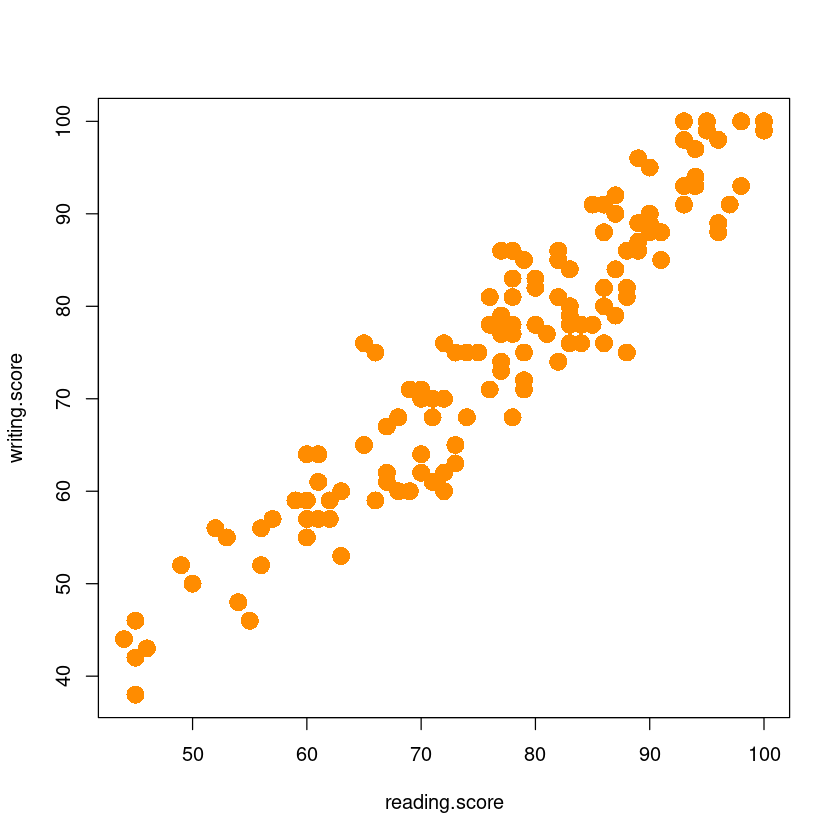

In [35]:

plot(y~x,
     data=dt,
     xlab="reading.score",
     ylab="writing.score",
     pch=16,
     cex=2,
     col="darkorange")


-   양의 상관관계가 있어 보인다.

# 회귀직선

In [36]:
model_ <- lm(y~x,dt)
model_

$\widehat y =-2.506 + 1.012 x$

In [77]:
summary(model_)

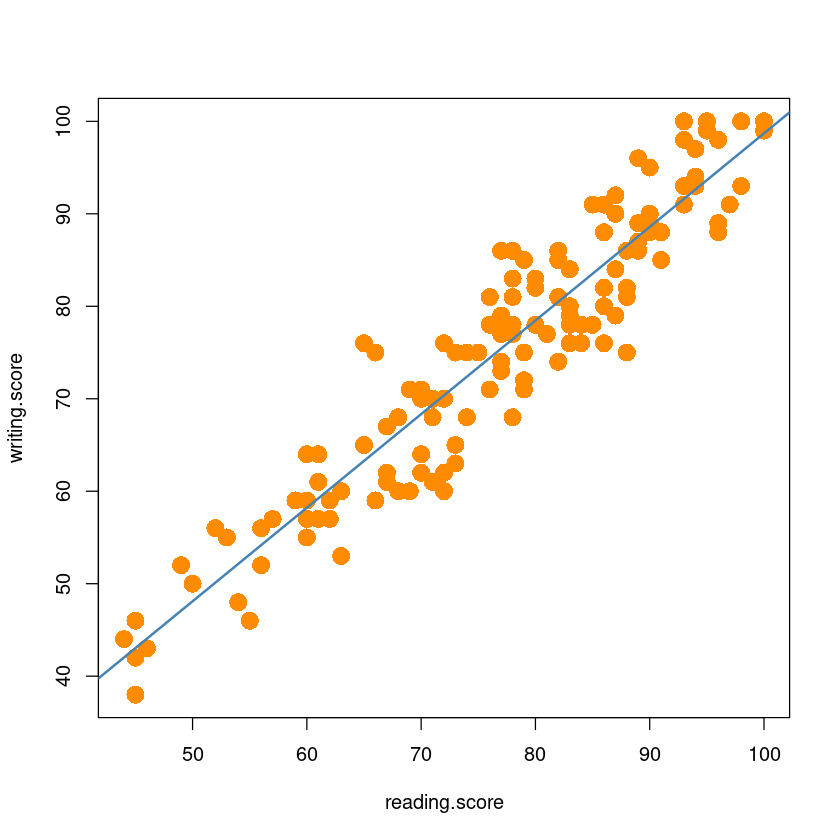

In [38]:

plot(y~x,
     data=dt,
     xlab="reading.score",
     ylab="writing.score",
     pch=16,
     cex=2,
     col="darkorange")


abline(model_, col='steelblue', lwd=2)

# 분산분석

In [39]:
anova(model_)

-   가정: $H_0: \beta_1 = 0$ vs $H_1: \beta_1 \neq 0$

In [40]:
qf(0.95,1,141)

-   $F_0 > F_{0.05}(0.95,1,141) = 3.91$ 이므로 귀무가설을 기각할 수
    잇다. 즉 회귀직선이 유의하다.

# 결정계수, 상관계수

In [41]:
summary(model_)$r.squared

In [44]:
Sxy <- sum((dt$x - mean(dt$x))*(dt$y - mean(dt$y)))
Sxx <- sum((dt$x - mean(dt$x))^2)
Syy <- sum((dt$y - mean(dt$y))^2)

In [45]:
rxy<-Sxy/sqrt(Sxx*Syy)

In [46]:
rxy**2

# 개별 회귀계수 유의성 검정

$β_0, β_1$에 대한 개별 회귀계수의 유의성검정을 수행하시오.

가설 $H_0: \beta_1 = 0$ vs $H_1: not H_0$

In [48]:
summary(model_)$coef

In [49]:
qt(0.975,141)

$\beta_0$의 t-value= -1.09540 \< 1.97693148863425 이므로 귀무가설을
기각할 수 없다.

# 신뢰구간

In [51]:
confint(model_, level=0.9)

# 평균반응

reading score가 61.2 인 학생의 평균 wiring score 예측하고, 95%
신뢰구간을 구하시오.

In [52]:
new_score <- data.frame(x=61.2)

`-` 코드

In [53]:
model_$coefficients[1] + model_$coefficients[2]*61.2

In [54]:
predict(model_, 
        newdata = new_score,
        interval = c("confidence"),  #구간추정
        level = 0.95)  ##평균반응

# 개별 y

reading score가 61.2 인 학생의 개별 wiring score 예측하고, 95%
신뢰구간을 구하시오.

In [56]:
predict(model_, newdata = new_score, 
        interval = c("prediction"),  
        level = 0.95)  ## 개별 y

# 잔차

In [61]:
data$yhat <- model_$fitted
data$resid <- model_$residuals

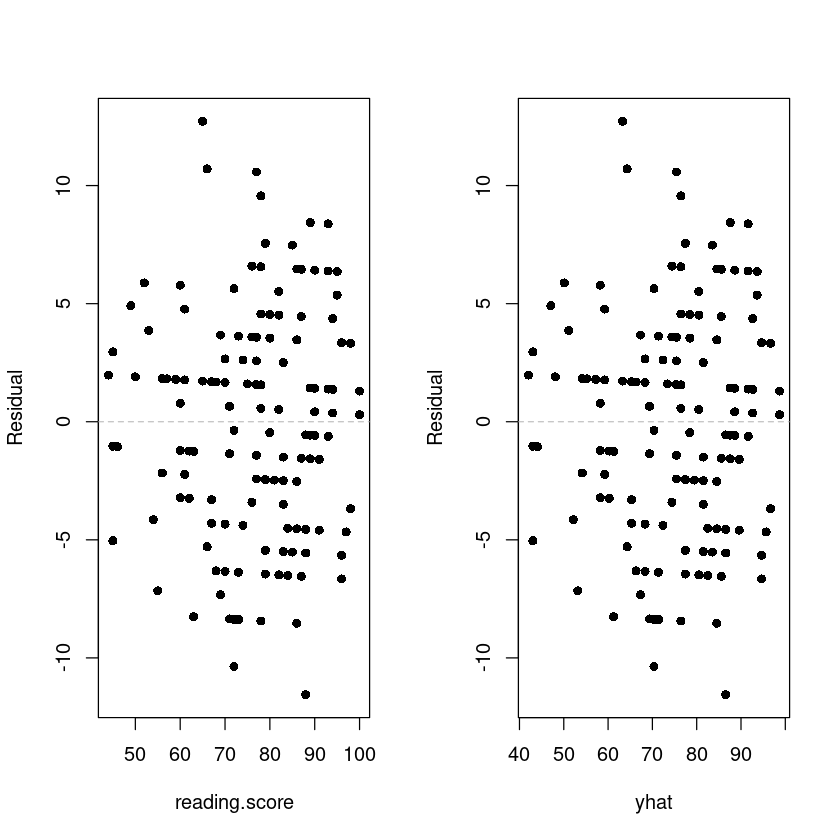

In [64]:
par(mfrow=c(1,2))
plot(resid ~ reading.score, data, pch=16, ylab = 'Residual')
abline(h=0, lty=2, col='grey')
plot(resid ~ yhat, data, pch=16, ylab = 'Residual')
abline(h=0, lty=2, col='grey')

In [68]:
bptest(model_)

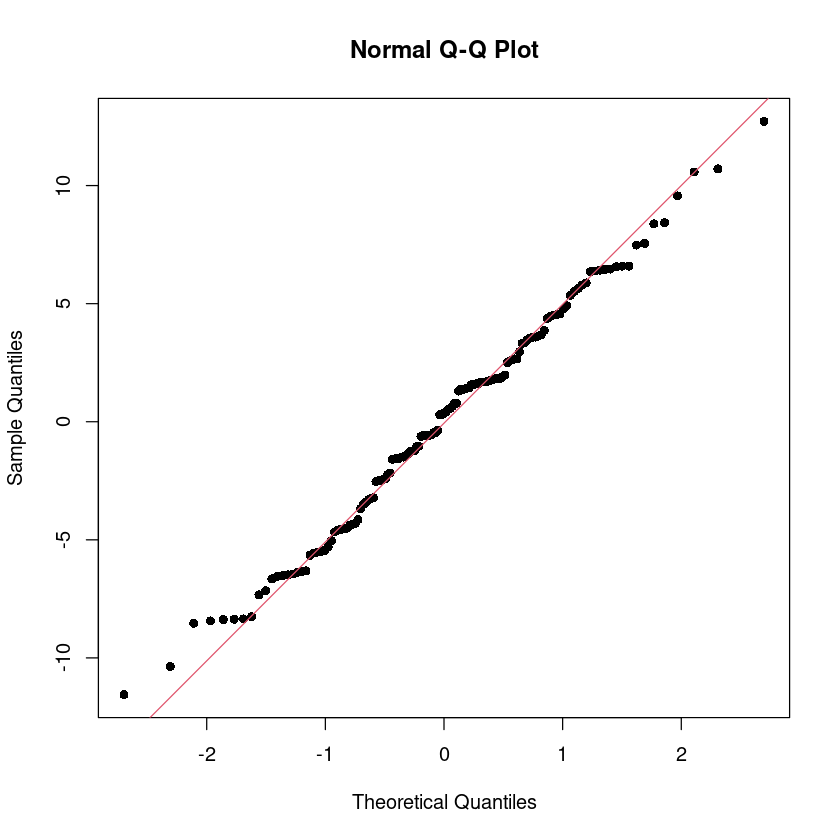

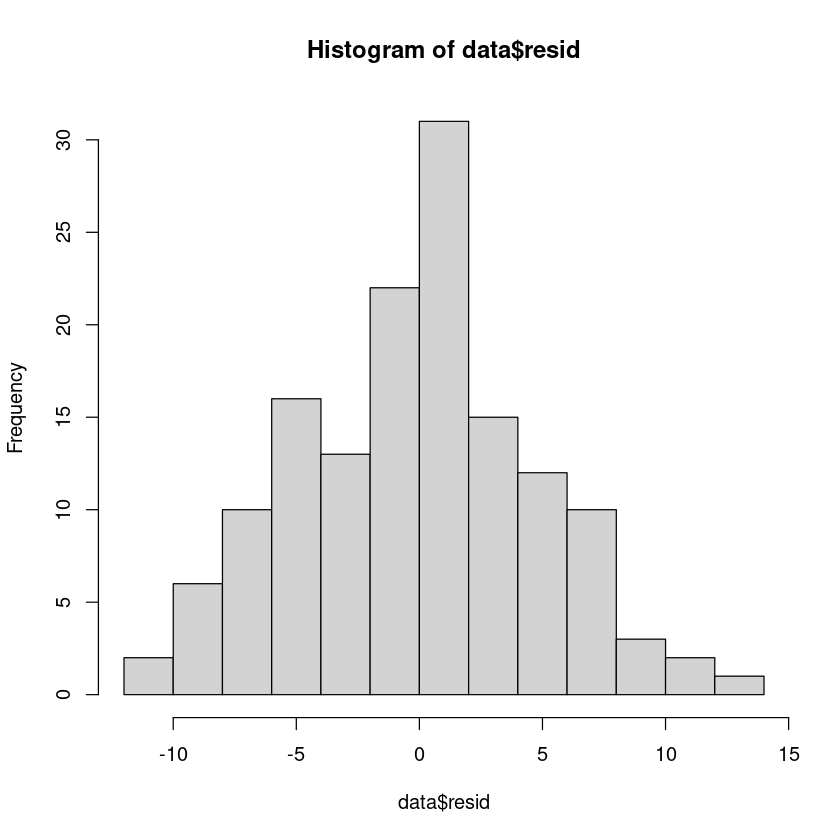

In [69]:
qqnorm(data$resid, pch=16)
qqline(data$resid, col=2)
hist(data$resid)

In [70]:
shapiro.test(resid(model_))

-   $H_0$: 정규성 만족, $H_1$: 정규성만족X

-   p-value의 값이 0.05 보다 크므로 귀무가설 채택. 즉 정규성 가정을
    만족한다.

In [71]:
dwtest(model_, alternative = "two.sided") 

-   H0 : uncorrelated vs H1 : rho != 0

p-value값이 0.275로 0.05보다 크므로 독립성을 먼족한다.